<a href="https://colab.research.google.com/github/Sulthana-2000/Machine-Learning-Classification-Models/blob/main/Drug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we are going to build different classification models from historical data of patients and their responses to different medications that can predict the drug type.

The machine learning models used in this project are:
`````
1.Linear Logistic Regression
2.Linear Support Vector Machine(SVM)
3.K-Nearest Neighbors
4.Naive Bayes
5.Decision Tree
6.Random Forest

`````

**About the Dataset**

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.


Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.


You can use the training part of the dataset to build a logistic regression,
 SVM, KNN, Naive Bayes, decision tree and Random Forest and then use it to predict the class of an unknown patient, or to prescribe it to a new patient.


**Loading the data**

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [2]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [4]:
# verify that there are no null columns in the dataset
df[df.isnull().any(axis=1)]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [5]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [7]:
df.shape

(200, 6)

**Pre-processing**

Using df as the Drug.csv data read by pandas, declare the following variables:
`````
*  x as the Features(input sample)
*  y as the Class lables(output sample)

`````



In [8]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [9]:
# to convert these categorical variables(objects) into numerical variables(integers) we can use label encoding
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Sex']=label.fit_transform(df['Sex'])
df['BP']=label.fit_transform(df['BP'])
df['Cholesterol']=label.fit_transform(df['Cholesterol'])

In [10]:
df.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
Drug            object
dtype: object

**Selecting features**

In [11]:
# Selecting dataset in features and target variables
x=df.iloc[:,:-1]
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [12]:
y=df.iloc[:,-1]
y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

**Exploratory Data Analysis(EDA)**

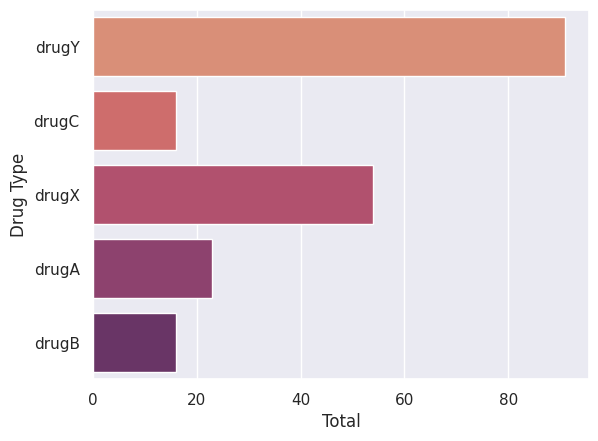

In [13]:
#Drug Type Distribution

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", hue="Drug",data=df, palette="flare",legend=False)
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

<ipython-input-14-acf58ec5e3d1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=df, palette="rocket")


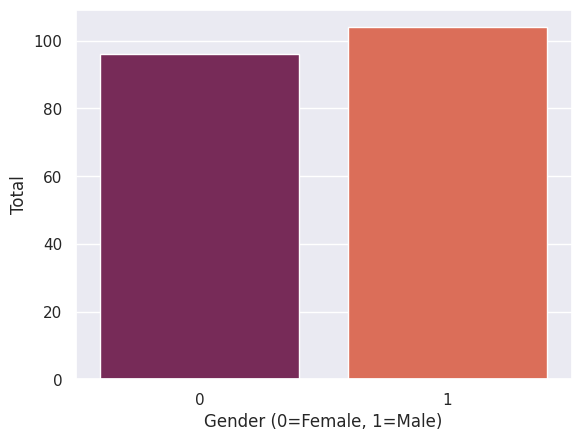

In [14]:
# gender distribution

sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=df, palette="rocket")
plt.xlabel('Gender (0=Female, 1=Male)')
plt.ylabel('Total')
plt.show()

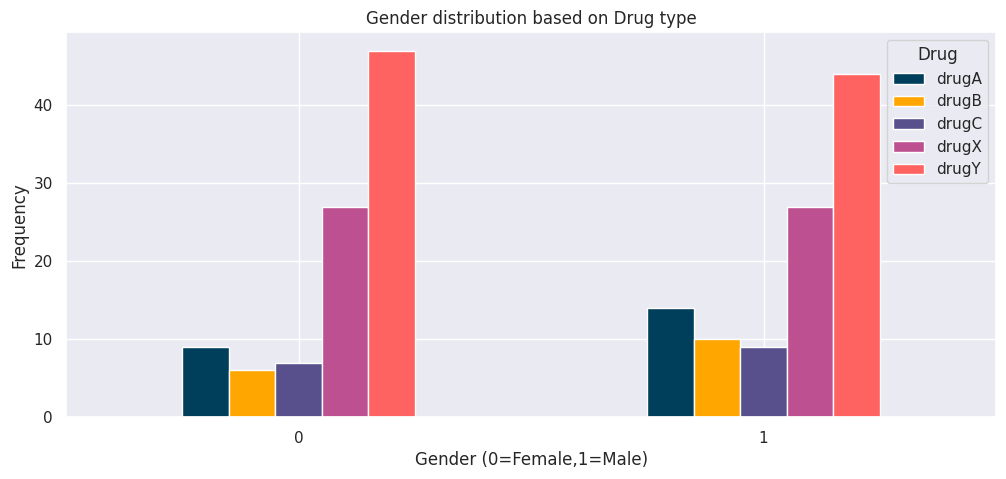

In [15]:
# gender distribution based on drug type

pd.crosstab(df.Sex,df.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender (0=Female,1=Male)')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

**Splitting the Dataset**

In [16]:
# Split x and y into training and testing datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [18]:
x_train

array([[-1.59046320e+00, -1.08972474e+00, -1.07048957e+00,
        -8.91555828e-01, -6.85429715e-01],
       [ 6.25107426e-01, -1.08972474e+00, -1.07048957e+00,
        -8.91555828e-01,  1.36866064e+00],
       [ 1.73289274e+00,  9.17662935e-01, -1.07048957e+00,
        -8.91555828e-01, -9.31781032e-01],
       [-1.74959744e-01,  9.17662935e-01,  1.28458749e-01,
        -8.91555828e-01, -8.75009148e-02],
       [ 9.67114161e-03,  9.17662935e-01,  1.32740707e+00,
         1.12163475e+00, -1.26344693e+00],
       [ 9.32825568e-01, -1.08972474e+00, -1.07048957e+00,
        -8.91555828e-01,  1.38028784e+00],
       [ 2.55845655e-01,  9.17662935e-01,  1.32740707e+00,
         1.12163475e+00, -2.73301507e-02],
       [ 1.11745645e+00,  9.17662935e-01, -1.07048957e+00,
         1.12163475e+00,  7.20008180e-01],
       [ 9.94369196e-01,  9.17662935e-01,  1.32740707e+00,
        -8.91555828e-01,  8.95232172e-02],
       [ 5.63563797e-01, -1.08972474e+00, -1.07048957e+00,
        -8.91555828e-01

In [19]:
x_test

array([[-0.60576514,  0.91766294,  0.12845875,  1.12163475, -0.66188463],
       [-1.83663771, -1.08972474, -1.07048957,  1.12163475, -0.06715331],
       [-1.71355045, -1.08972474,  1.32740707,  1.12163475, -1.05052382],
       [ 0.80973831, -1.08972474,  0.12845875, -0.89155583, -0.80431784],
       [ 0.07121477,  0.91766294,  0.12845875,  1.12163475,  2.5527457 ],
       [ 0.31738928,  0.91766294, -1.07048957, -0.89155583,  0.33674657],
       [-1.71355045, -1.08972474, -1.07048957,  1.12163475,  1.20602517],
       [-1.09811417, -1.08972474,  1.32740707, -0.89155583, -0.45041492],
       [-0.23650337,  0.91766294, -1.07048957,  1.12163475, -0.46683834],
       [ 1.24054371, -1.08972474,  1.32740707,  1.12163475, -1.14397745],
       [-1.03657054,  0.91766294, -1.07048957, -0.89155583, -0.45375774],
       [-1.5904632 , -1.08972474,  0.12845875,  1.12163475, -0.62380555],
       [-0.48267789,  0.91766294,  0.12845875, -0.89155583,  0.33674657],
       [-1.65200683, -1.08972474, -1.0

**Model development and prediction**

In [20]:
# Logistic Regression

# import the class
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

# fit the model with data
log.fit(x_train, y_train)

y_pred = log.predict(x_test)

In [21]:
from sklearn import metrics
confusion_matrix= metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 7,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  2,  3,  1],
       [ 0,  0,  0, 18,  0],
       [ 1,  2,  0,  1, 22]])

In [22]:
# All Evaluation measures in one table
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))

print('***********************')
logreg=accuracy_score(y_test,y_pred)
print('Logistic Regression accuracy :',logreg*100)

              precision    recall  f1-score   support

       drugA       0.88      1.00      0.93         7
       drugB       0.60      1.00      0.75         3
       drugC       1.00      0.33      0.50         6
       drugX       0.82      1.00      0.90        18
       drugY       0.96      0.85      0.90        26

    accuracy                           0.87        60
   macro avg       0.85      0.84      0.80        60
weighted avg       0.89      0.87      0.86        60

***********************
Logistic Regression accuracy : 86.66666666666667


In [43]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [44]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))

from sklearn import metrics
confusion_matrix= metrics.confusion_matrix(y_test, y_pred)
print('***********************')
print('Confusion Matrix:')
print(confusion_matrix)

print('\n***********************')
knn=accuracy_score(y_test,y_pred)
print('\nK-Nearest Neighbors accuracy :',knn*100)

              precision    recall  f1-score   support

       drugA       0.70      1.00      0.82         7
       drugB       0.43      1.00      0.60         3
       drugC       1.00      0.33      0.50         6
       drugX       0.89      0.94      0.92        18
       drugY       1.00      0.85      0.92        26

    accuracy                           0.85        60
   macro avg       0.80      0.82      0.75        60
weighted avg       0.90      0.85      0.85        60

***********************
Confusion Matrix:
[[ 7  0  0  0  0]
 [ 0  3  0  0  0]
 [ 1  2  2  1  0]
 [ 1  0  0 17  0]
 [ 1  2  0  1 22]]

***********************

K-Nearest Neighbors accuracy : 85.0


In [46]:
# Naive_bayes
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [47]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))

from sklearn import metrics
confusion_matrix= metrics.confusion_matrix(y_test, y_pred)
print('***********************')
print('Confusion Matrix:')
print(confusion_matrix)

print('\n***********************')
naive=accuracy_score(y_test,y_pred)
print('\nNaive Bayes Accuracy :',naive*100)

              precision    recall  f1-score   support

       drugA       0.88      1.00      0.93         7
       drugB       0.50      1.00      0.67         3
       drugC       0.75      1.00      0.86         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      0.77      0.87        26

    accuracy                           0.90        60
   macro avg       0.82      0.95      0.87        60
weighted avg       0.94      0.90      0.90        60

***********************
Confusion Matrix:
[[ 7  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 18  0]
 [ 1  3  2  0 20]]

***********************

Naive Bayes Accuracy : 90.0


In [48]:
# SVM
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [49]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))

from sklearn import metrics
confusion_matrix= metrics.confusion_matrix(y_test, y_pred)
print('***********************')
print('Confusion Matrix:')
print(confusion_matrix)

print('\n***********************')
SVM=accuracy_score(y_test,y_pred)
print('\nSVM accuracy :',SVM*100)

              precision    recall  f1-score   support

       drugA       1.00      0.71      0.83         7
       drugB       0.43      1.00      0.60         3
       drugC       1.00      0.83      0.91         6
       drugX       0.95      1.00      0.97        18
       drugY       0.96      0.88      0.92        26

    accuracy                           0.90        60
   macro avg       0.87      0.89      0.85        60
weighted avg       0.94      0.90      0.91        60

***********************
Confusion Matrix:
[[ 5  2  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  1]
 [ 0  0  0 18  0]
 [ 0  2  0  1 23]]

***********************

SVM accuracy : 90.0


In [50]:
# Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [51]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))

from sklearn import metrics
confusion_matrix= metrics.confusion_matrix(y_test, y_pred)
print('***********************')
print('Confusion Matrix:')
print(confusion_matrix)

print('\n***********************')
dtree=accuracy_score(y_test,y_pred)
print('\nDecision Tree Classifier accuracy :',dtree*100)

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

***********************
Confusion Matrix:
[[ 7  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 26]]

***********************

Decision Tree Classifier accuracy : 100.0


In [52]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [53]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))

from sklearn import metrics
confusion_matrix= metrics.confusion_matrix(y_test, y_pred)
print('***********************')
print('Confusion Matrix:')
print(confusion_matrix)

print('\n***********************')
rforest=accuracy_score(y_test,y_pred)
print('\nRandom Forest Classifier accuracy :',rforest*100)

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

***********************
Confusion Matrix:
[[ 7  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 26]]

***********************

Random Forest Classifier accuracy : 100.0


**Model Comparison**

In [58]:
import pandas as pd
# define the data
data={'Model':['Logistic Regression','K-Nearest Neighbors','Naive Bayes','SVM','Decision Tree','Random Forest'],
      'Accuracy':[logreg*100, knn*100, naive*100, SVM*100, dtree*100,rforest*100]}

# create the dataframe
df=pd.DataFrame(data)

# display the dataframe
print(df.sort_values(by='Accuracy',ascending=False))


                 Model    Accuracy
4        Decision Tree  100.000000
5        Random Forest  100.000000
2          Naive Bayes   90.000000
3                  SVM   90.000000
0  Logistic Regression   86.666667
1  K-Nearest Neighbors   85.000000


From the above results, it can be seen that most of ML models can reach more than 80% accuracy in predicting classification of drug type.